In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# 学習に使用するデータセット
from sklearn.datasets import make_moons

In [3]:
moons = make_moons(n_samples=200,noise=0.1,random_state=0)

# 最初の配列がdata,後ろの配列が正解ラベルのtarget
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [7]:
# data
x = moons[0]
x

array([[ 7.92357355e-01,  5.02648573e-01],
       [ 1.63158315e+00, -4.63896705e-01],
       [-6.71092674e-02,  2.67767057e-01],
       [-1.04412427e+00, -1.82607610e-01],
       [ 1.76704822e+00, -1.98609868e-01],
       [ 1.90607398e+00, -7.10915927e-02],
       [ 9.62192129e-01,  2.61986075e-01],
       [ 8.86813848e-01, -4.84896235e-01],
       [ 8.68935196e-01,  3.61092776e-01],
       [ 1.15352953e+00, -5.72352929e-01],
       [-3.70714493e-01,  7.21655833e-01],
       [ 1.95523229e-01, -2.64439358e-01],
       [ 1.80949658e+00, -1.94707885e-01],
       [ 1.29046617e+00, -3.23893778e-01],
       [-8.23662620e-01,  7.17643700e-01],
       [ 9.85881879e-01,  1.96706218e-01],
       [ 5.81943503e-01,  9.06311048e-01],
       [ 2.76118902e-01, -2.87451069e-01],
       [ 3.17284813e-01,  8.54200996e-01],
       [-8.52697952e-01,  9.32383274e-01],
       [ 1.97796688e+00,  1.04796611e-02],
       [ 8.64249290e-01, -4.63242870e-01],
       [ 2.57499053e-01,  1.00362573e+00],
       [ 1.

In [6]:
# 正解ラベル
y = moons[1]
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

[]

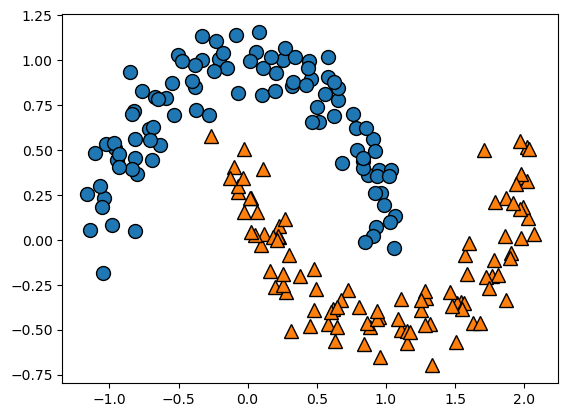

In [8]:
# データを表示
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.plot()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# まずは、本当にSVCでは分類できないのかやってみる
from sklearn.svm import LinearSVC

In [13]:
# テスト用とトレーニング用にデータを分離
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=0)

scaler=StandardScaler()

# SCV実行
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# 150個のデータと2個の特徴を持つことがわかる。
print(x_train_scaled.shape)
print(x_train_scaled)

lin_svm = LinearSVC().fit(x_train_scaled,y_train)

(150, 2)
[[ 0.53020398 -1.44518611]
 [ 0.57528258  0.46466937]
 [-1.42860032  1.11279612]
 [-0.20487306 -0.27315887]
 [ 0.79052165 -1.47568593]
 [ 0.58357064 -0.35918098]
 [-0.77177478  1.46483146]
 [ 0.25422613  1.01852164]
 [-0.83609473  0.63324561]
 [ 1.81355513  0.57282621]
 [ 0.01269613 -1.43911205]
 [-1.47577081  0.2187003 ]
 [ 1.69128147 -0.46100051]
 [ 1.33598205 -1.182933  ]
 [-0.91538733  1.70859583]
 [-0.79499797  1.65746415]
 [-0.40626225 -0.55686984]
 [ 1.47496143 -1.39840826]
 [ 1.89552481  0.48811767]
 [-1.51808076  0.86661117]
 [ 1.26752249 -1.60890549]
 [-1.34246996  0.36581585]
 [ 0.64776941 -0.11569514]
 [ 0.96669652 -1.26464515]
 [ 1.75410591 -0.0974581 ]
 [ 0.02097792  1.24509275]
 [ 0.41811113  0.48105682]
 [ 0.16841005  1.26841551]
 [ 1.37602303 -0.53798269]
 [-0.45495858 -0.44698981]
 [-0.60183001  0.02291168]
 [ 0.466701    0.27872171]
 [-1.73667558  0.53735077]
 [ 1.52072307 -0.90576337]
 [ 1.93679884 -0.43071871]
 [-1.69015508 -0.34068117]
 [ 0.55521666  0.59

Text(0, 0.5, '$x_1$')

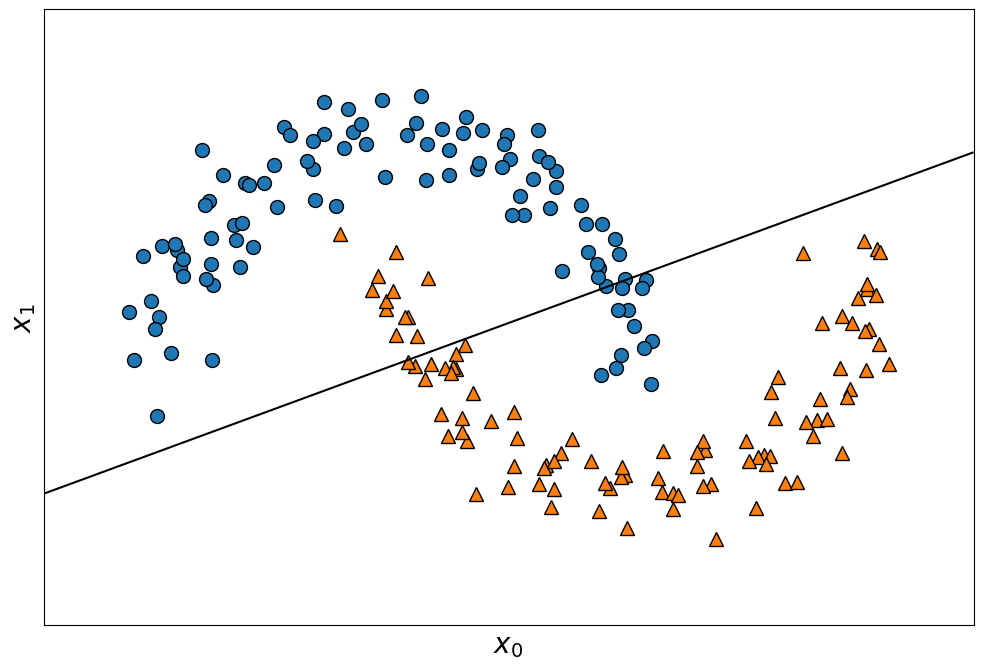

In [11]:
plt.figure(figsize=(12,8))
mglearn.plots.plot_2d_separator(lin_svm,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$",fontsize=20)
# SVCでは不可だと分かる

In [15]:
# 高次特徴空間に写像してやってみる(PolynomialFeaturesで実現できる)
from sklearn.preprocessing import PolynomialFeatures

# dgree=3で3次元
poly = PolynomialFeatures(degree=3)

# 高次元化
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# 150個のデータと10個の特徴に拡張されたことがわかる。
print(x_train_poly.shape)
print(x_train_poly)

(150, 10)
[[ 1.00000000e+00  8.86813848e-01 -4.84896235e-01 ... -3.81341214e-01
   2.08511538e-01 -1.14010917e-01]
 [ 1.00000000e+00  9.24799914e-01  4.94247065e-01 ...  4.22707215e-01
   2.25910272e-01  1.20734753e-01]
 [ 1.00000000e+00 -7.63797985e-01  8.26528213e-01 ...  4.82186114e-01
  -5.21787743e-01  5.64641828e-01]
 ...
 [ 1.00000000e+00 -9.68196502e-01  5.38851311e-01 ...  5.05121626e-01
  -2.81126249e-01  1.56461263e-01]
 [ 1.00000000e+00 -6.70964946e-01  7.93803059e-01 ...  3.57365342e-01
  -4.22790644e-01  5.00193800e-01]
 [ 1.00000000e+00 -2.68526403e-02  5.04722011e-01 ...  3.63937020e-04
  -6.84055729e-03  1.28575060e-01]]


In [20]:
# どのように次元を拡張したのか確認する
# 高次元化するほど、計算コストがかかる。→カーネル法を利用すると計算コストを削減できる
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1',
       'x0 x1^2', 'x1^3'], dtype=object)

In [22]:
# 写像したデータをスケーリングして学習
x_tarin_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.fit_transform(x_test_poly)

lin_svm = LinearSVC().fit(x_tarin_poly_scaled,y_train)

# testデータで予測した結果と、実際の正解ラベルが一致したらTrueとする
lin_svm.predict(x_test_poly_scaled) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [24]:
# データの前処理として、PolynomialFeaturesやStandardScalerを実行するのが手間。
# Pipelineを使ってデータの前処理を簡素化してみる
from sklearn.pipeline import Pipeline

poly_svm = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm',LinearSVC())
])

# Pipelineで定義した処理を実行
poly_svm.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm', LinearSVC())])

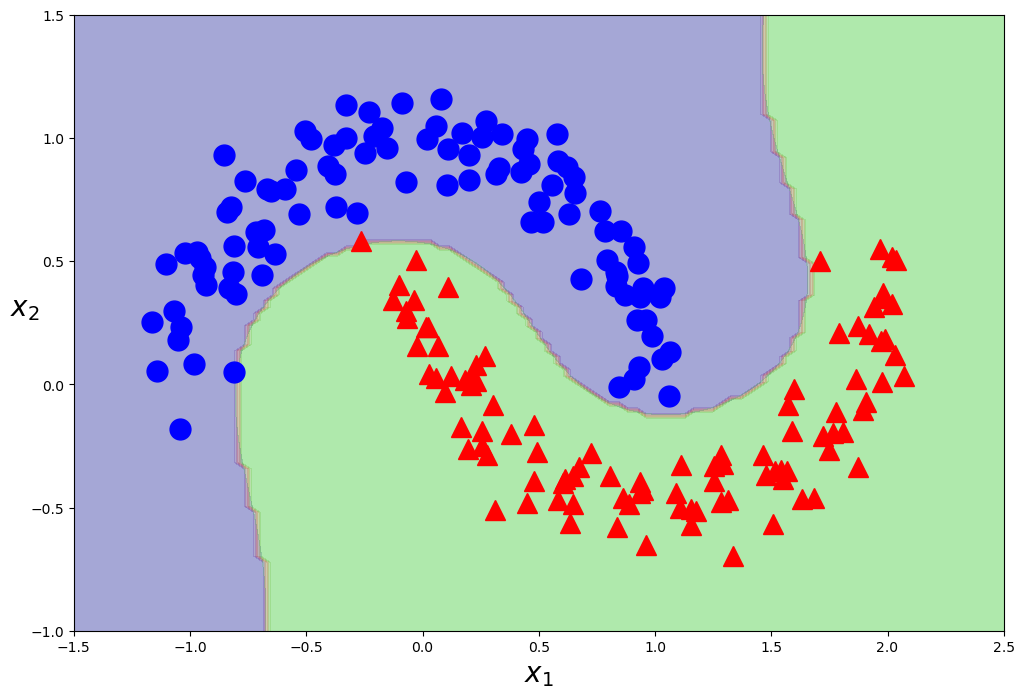

In [26]:
# グラフ描画関数
def plot_decision_function(model):
    _x0 = np.linspace(-1.5,2.5,100)
    _x1 = np.linspace(-1.0,1.5,100)
    x0,x1 = np.meshgrid(_x0,_x1)
    x = np.c_[x0.ravel(),x1.ravel()]
    y_pred = model.predict(x).reshape(x0.shape)
    y_decision = model.decision_function(x).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
    plt.contourf(x0,x1,y_decision,levels=[y_decision.min(),0,y_decision.max()],alpha=0.3)

# 元のデータセットのグラフを描画する関数
def plot_dataset(x,y):
    plt.plot(x[:,0][y==0],x[:,1][y==0],'bo',ms=15)
    plt.plot(x[:,0][y==1],x[:,1][y==1],'r^',ms=15)
    plt.xlabel("$x_1$",fontsize=20)
    plt.ylabel("$x_2$",fontsize=20,rotation=0)

# グラフを描画
plt.figure(figsize=(12,8))
plot_decision_function(poly_svm)
plot_dataset(x,y)

plt.show()

In [27]:
# 以上の機械学習では、計算コストがかかるため、計算コスト削減としてカーネル法を用いる。
from sklearn.svm import SVC

# kernelという引数にpolyを指定することで多項式回帰のカーネル関数を適応させる
kernel_svm = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(kernel='poly',degree=3,coef0=1))
])

# 学習実行
kernel_svm.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(coef0=1, kernel='poly'))])

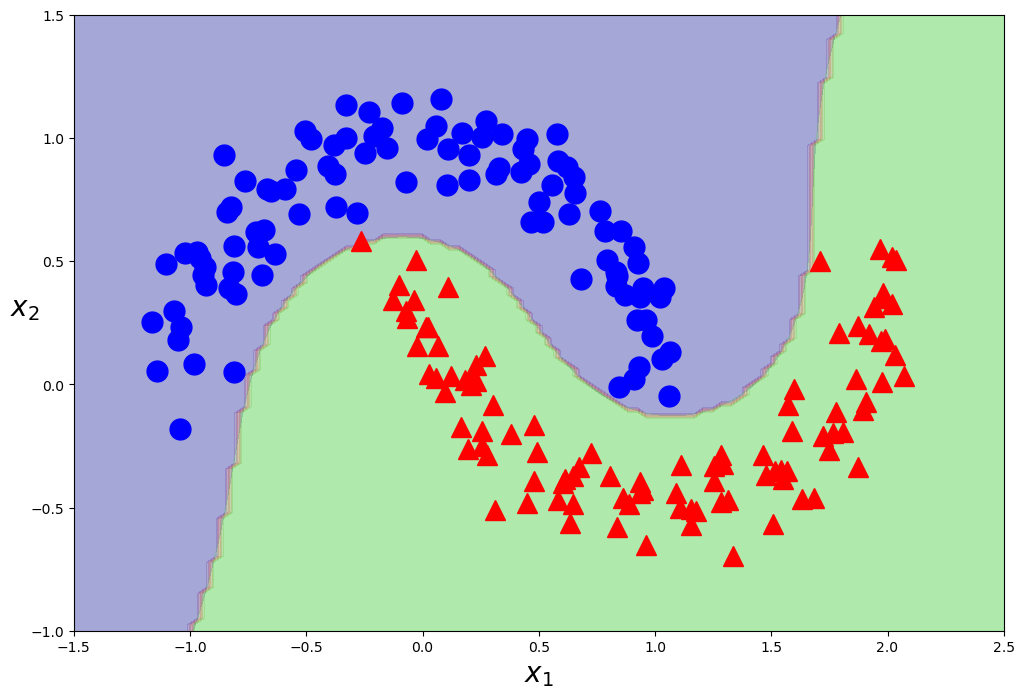

In [28]:
# グラフを描画
plt.figure(figsize=(12,8))
plot_decision_function(kernel_svm)
plot_dataset(x,y)
plt.show()

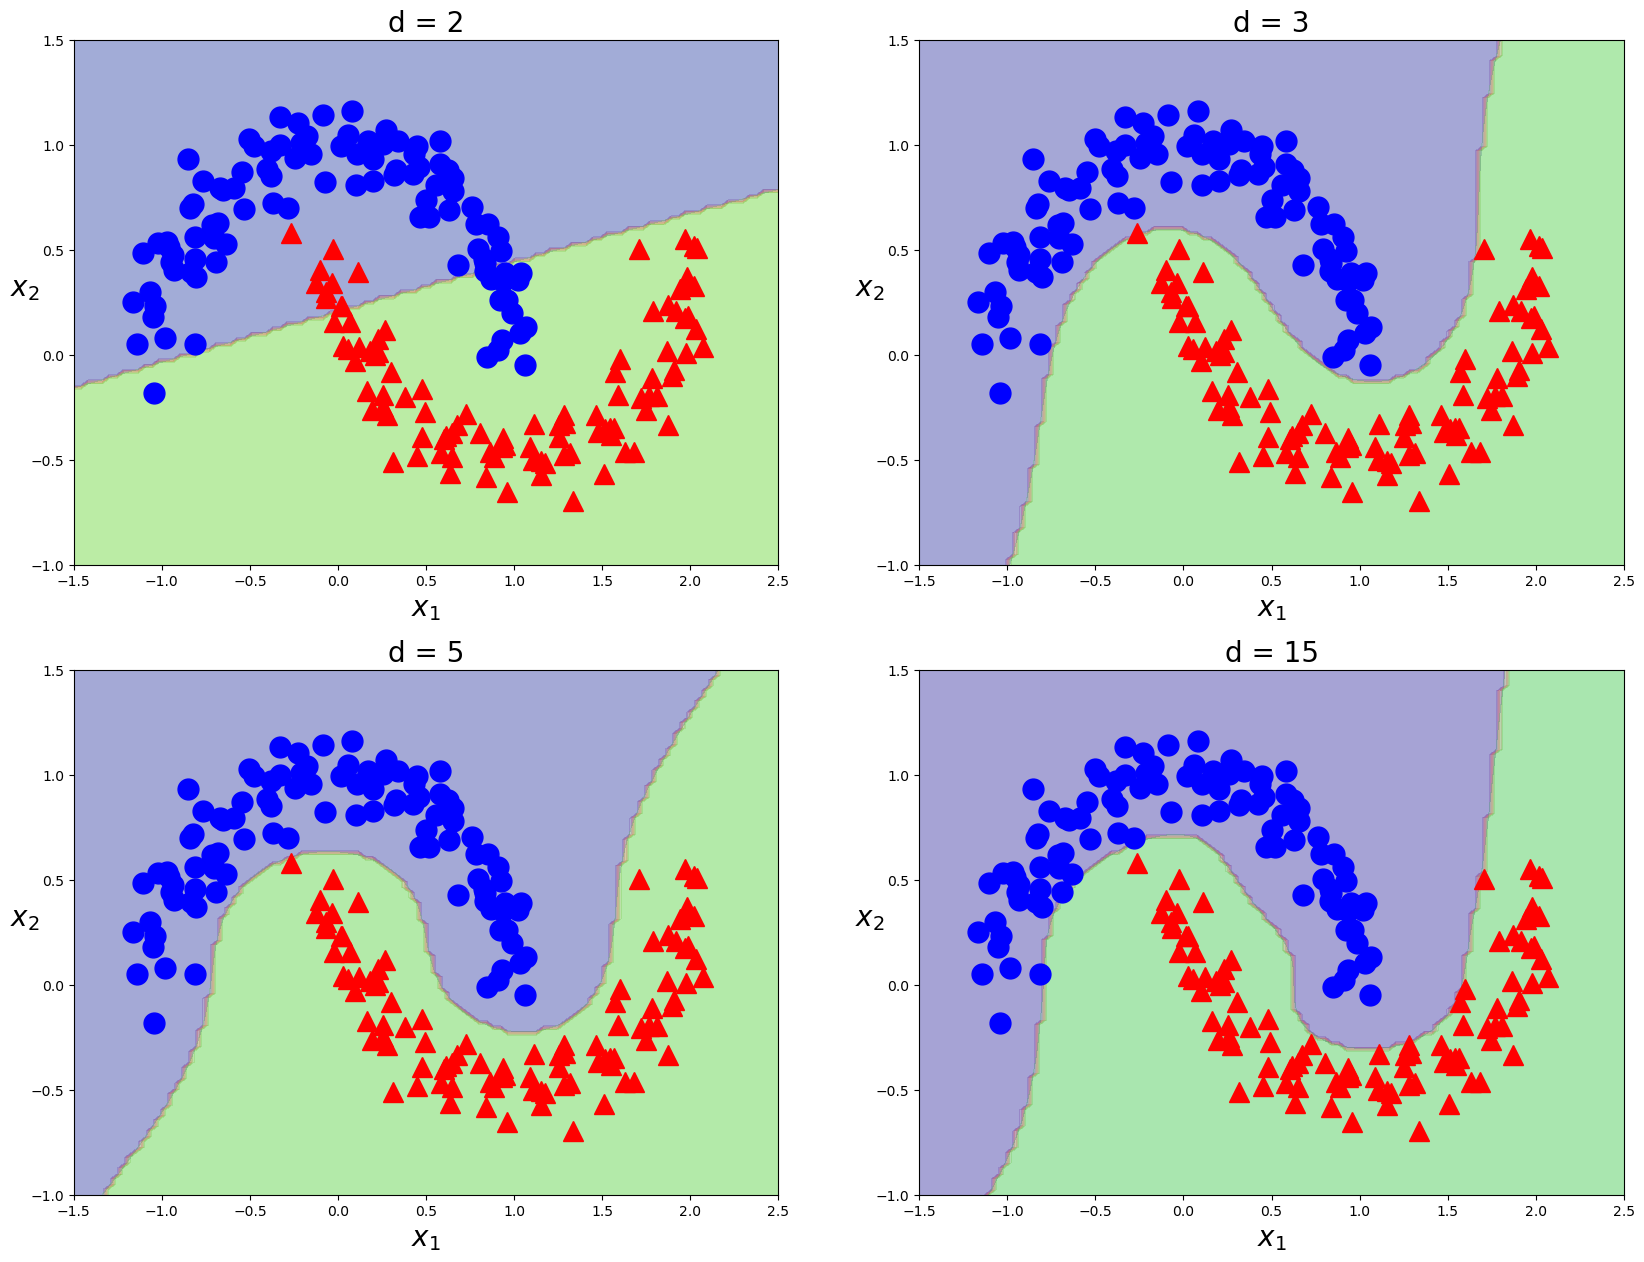

In [29]:
# degreeを2,3,5,15と増やした場合

plt.figure(figsize=(20,15))

for i,degree in enumerate([2,3,5,15]):
    poly_kernel_svm = Pipeline([
        ('scaler',StandardScaler()),
        ('svm',SVC(kernel='poly',degree=degree,coef0=1))
    ])
    
    poly_kernel_svm.fit(x,y)
    
    plt.subplot(221 + i)
    plot_decision_function(poly_kernel_svm)
    plot_dataset(x,y)
    plt.title("d = {}".format(degree),fontsize=20)
    
plt.show()